In [ ]:
!pip install python==3.9
!pip install pandas==1.5.3
!pip install pandas-profiling==3.4.0
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'project-tbgiang-2023' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python==3.9 (from versions: none)
ERROR: No matching distribution found for python==3.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Reference SQL syntax from the original job


In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_18a9c7e9_186721693cf') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT order_item.id order_item_id ,order_item.order_id,order_item.status, order_item.created_at, order_item.shipped_at, order_item.delivered_at, order_item.returned_at, order_item.sale_price,order_item.num_of_item, users.id use_id, users.first_name, users.last_name, users.gender, users.country, users.city
FROM
(
SELECT order_items.*, orders.num_of_item
FROM  `bigquery-public-data.thelook_ecommerce.order_items` order_items
LEFT JOIN `bigquery-public-data.thelook_ecommerce.orders` orders ON order_items.order_id = orders.order_id
) order_item
LEFT JOIN `bigquery-public-data.thelook_ecommerce.users`  users ON order_item.user_id = users.id 


# Result set loaded from BigQuery job as a DataFrame

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_18a9c7e9_186721693cf') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

order_item_id  order_id      status                       created_at  \
0               75076     51556     Shipped        2022-11-28 07:41:06+00:00   
1              118747     81570     Shipped 2023-02-18 05:33:36.794320+00:00   
2              151249    104163    Complete        2020-05-24 07:52:03+00:00   
3              171188    117911    Complete        2022-03-21 10:50:31+00:00   
4               24820     17024   Cancelled        2022-07-06 22:06:32+00:00   
...               ...       ...         ...                              ...   
181051          12094      8307     Shipped        2022-10-13 05:13:26+00:00   
181052         149990    103289    Complete        2020-07-29 11:20:00+00:00   
181053         167023    115042    Complete        2020-07-14 07:58:58+00:00   
181054          91512     62911   Cancelled        2022-12-24 14:45:56+00:00   
181055          64429     44200  Processing        2022-08-04 13:37:47+00:00   

                             shipped_at              delivered_at returned_at  \
0             2022-11-25 02:28:00+00:00                       NaT         NaT   
1      2023-02-19 09:57:20.794320+00:00                       NaT         NaT   
2             2020-05-27 05:57:00+00:00 2020-05-29 12:46:00+00:00         NaT   
3             2022-03-20 15:46:00+00:00 2022-03-23 09:12:00+00:00         NaT   
4                                   NaT                       NaT         NaT   
...                                 ...                       ...         ...   
181051        2022-10-12 19:19:00+00:00                       NaT         NaT   
181052        2020-07-30 04:14:00+00:00 2020-08-01 17:55:00+00:00         NaT   
181053        2020-07-16 00:17:00+00:00 2020-07-16 06:04:00+00:00         NaT   
181054                              NaT                       NaT         NaT   
181055                              NaT                       NaT         NaT   

        sale_price  num_of_item  use_id first_name last_name gender  \
0             2.50            4   41381  Gwendolyn   Burgess      F   
1             2.50            1   65442     Hannah      Ryan      F   
2             2.50            1   83551      Tanya      Ryan      F   
3             2.50            2   94564  Stephanie   Johnson      F   
4             2.50            1   13616    Cynthia  Erickson      F   
...            ...          ...     ...        ...       ...    ...   
181051        9.82            4    6672     Denise    Parker      F   
181052        9.82            2   82824     Ashley      Chan      F   
181053        9.82            1   92289    Heather    Taylor      F   
181054        9.82            2   50497     Denise    Carter      F   
181055        9.82            3   35394      Amber     Ochoa      F   

            country        city  
0            France     Roubaix  
1       South Korea       Busan  
2         Australia   Toowoomba  
3            Brasil      Manaus  
4       South Korea  Suwon City  
...             ...         ...  
181051       Brasil      Palmas  
181052        China        Chat  
181053        China     Nanjing  
181054    Australia   Melbourne  
181055        China      Foshan  

[181056 rows x 15 columns]

## Show descriptive statistics using describe()


In [ ]:
results.describe()

order_item_id      order_id     sale_price  num_of_item        use_id
count       181056.0      181056.0  181056.000000     181056.0      181056.0
mean         90528.5  62247.004319      59.311024     1.900307  49927.383185
std     52266.509507  36002.475097      66.062157      1.06248  28889.445237
min              1.0           1.0       0.020000          1.0           1.0
25%         45264.75       31014.0      24.500000          1.0       24793.0
50%          90528.5       62228.5      39.990002          2.0       49959.5
75%        135792.25      93353.25      69.669998          2.0       74884.0
max         181056.0      124648.0     999.000000          4.0      100000.0

# Data explore

## Data information

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181056 entries, 0 to 181055
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   order_item_id  181056 non-null  object             
 1   order_id       181056 non-null  object             
 2   status         181056 non-null  object             
 3   created_at     181056 non-null  datetime64[ns, UTC]
 4   shipped_at     117282 non-null  datetime64[ns, UTC]
 5   delivered_at   62913 non-null   datetime64[ns, UTC]
 6   returned_at    18007 non-null   datetime64[ns, UTC]
 7   sale_price     181056 non-null  float64            
 8   num_of_item    181056 non-null  Int64              
 9   user_id        181056 non-null  object             
 10  first_name     181056 non-null  object             
 11  last_name      181056 non-null  object             
 12  gender         181056 non-null  object             
 13  country        181056 non-nul

- 15 columns  and 181056 rows in this dataset.
- Shipped_at, delivered_at,returned_at columns has nan.
- user_id, order_item_id and order_id is string variable


# Data Pre-processing

## Modify structure type of data  
Cover type of data

In [ ]:
#Cover type of data: order_item_id, order_id, use_id 
results['order_item_id'] = results['order_item_id'].astype(str)
results['order_id'] = results['order_id'].astype(str)
results['use_id'] = results['use_id'].astype(str)

#Check type of data
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181056 entries, 0 to 181055
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   order_item_id  181056 non-null  object             
 1   order_id       181056 non-null  object             
 2   status         181056 non-null  object             
 3   created_at     181056 non-null  datetime64[ns, UTC]
 4   shipped_at     117282 non-null  datetime64[ns, UTC]
 5   delivered_at   62913 non-null   datetime64[ns, UTC]
 6   returned_at    18007 non-null   datetime64[ns, UTC]
 7   sale_price     181056 non-null  float64            
 8   num_of_item    181056 non-null  Int64              
 9   use_id         181056 non-null  object             
 10  first_name     181056 non-null  object             
 11  last_name      181056 non-null  object             
 12  gender         181056 non-null  object             
 13  country        181056 non-nul

## Modify columns name and remove gaps in name

In [ ]:
# Modify columnes name
import re 
for columnname in results.columns:
  new_columnname = re.sub('\s+','',columnname)
  results.rename(columns = {columnname: new_columnname},inplace = True)

In [ ]:
# Rename column name
results.rename(columns = {'use_id':'user_id'}, inplace = True)


In [ ]:
# Check structure of column name
results.columns

Index(['order_item_id', 'order_id', 'status', 'created_at', 'shipped_at',
       'delivered_at', 'returned_at', 'sale_price', 'num_of_item', 'user_id',
       'first_name', 'last_name', 'gender', 'country', 'city'],
      dtype='object')

## Change column to row - Using melt




In [ ]:
#df1_new = pd.melt(frame=df1,   
#id_vars='State',   
#var_name='College_year',   
#value_name='In-District 2 Year Tuition Fee')

## Link 2 table with melt



In [ ]:
#df_new = pd.merge(left=df1_new,   
                  #right=df2_new,   
                  #on=['State', 'College_year'])

## Handle missing data



In [ ]:
#Check null value in dataset
results.isnull().sum()

order_item_id         0
order_id              0
status                0
created_at            0
shipped_at        63774
delivered_at     118143
returned_at      163049
sale_price            0
num_of_item           0
user_id               0
first_name            0
last_name             0
gender                0
country               0
city                  0
dtype: int64

In [ ]:
#df_new.fillna('0', inplace=True) 

#drop.na()

## Handle comman ',' in numberic data



In [ ]:
#df_new['In-District 2 Year Tuition Fee'] = df_new['In-District 2 Year Tuition Fee'].str\
                                            #.replace('\D', '').astype(int)
#df_new['In-State 4 Year Tuition Fee'] = df_new['In-State 4 Year Tuition Fee'].str\
                                            #.replace('\D', '').astype(int)
#df_new.head()

## Handle Float type

In [ ]:
#df_group['Avg. In-District 2 Year Tuition Fee'] = df_group['Avg. In-District 2 Year Tuition Fee'].apply(
    #lambda x: round(x, 2)
#)
#df_group['Avg. In-State 4 Year Tuition Fee'] = df_group['Avg. In-State 4 Year Tuition Fee'].apply(
    #lambda x: round(x, 2)
#)
#df_group.head()

## Extract Year, Quater, Month from Datetime column

In [ ]:
# Extract Year, Quarter and Month from Created_at columns

results['year'] = pd.DatetimeIndex(results['created_at']).year
results['quarter'] = pd.DatetimeIndex(results['created_at']).quarter
results['month'] = pd.DatetimeIndex(results['created_at']).month

In [ ]:
#Check time in dataset
results['year'].unique()

array([2022, 2023, 2020, 2021, 2019])

In [ ]:
#Check month of each year
results.groupby(['year'])['month'].nunique()


year
2019    12
2020    12
2021    12
2022    12
2023     2
Name: month, dtype: int64

Data was been collected from 2019 to 2023.

Can compare revenue between 2019 to 2022 that will provide growth rate year by year.

In [ ]:
#Check country and city
print('Number of countries in dataset:', results['country'].nunique(),'\n')
print(results['country'].unique(),'\n')




Number of countries in dataset: 16 

['France' 'South Korea' 'Australia' 'Brasil' 'United States' 'China'
 'Germany' 'Spain' 'United Kingdom' 'Japan' 'Belgium' 'Poland' 'Colombia'
 'Deutschland' 'Austria' 'España'] 



In [ ]:
#Check number of cities in each year
results.groupby(['country'])['city'].nunique()

country
Australia          382
Austria              1
Belgium            340
Brasil             734
China              255
Colombia             1
Deutschland          1
España               1
France            1135
Germany            747
Japan              201
Poland               7
South Korea         87
Spain              720
United Kingdom     591
United States     2418
Name: city, dtype: int64

# Data visualization

## What year has the hightest number of sales during the period of five years?



In [ ]:
results['revenue'] = results['sale_price']*results['num_of_item']
results.head()

order_item_id order_id     status                       created_at  \
0         75076    51556    Shipped        2022-11-28 07:41:06+00:00   
1        118747    81570    Shipped 2023-02-18 05:33:36.794320+00:00   
2        151249   104163   Complete        2020-05-24 07:52:03+00:00   
3        171188   117911   Complete        2022-03-21 10:50:31+00:00   
4         24820    17024  Cancelled        2022-07-06 22:06:32+00:00   

                        shipped_at              delivered_at returned_at  \
0        2022-11-25 02:28:00+00:00                       NaT         NaT   
1 2023-02-19 09:57:20.794320+00:00                       NaT         NaT   
2        2020-05-27 05:57:00+00:00 2020-05-29 12:46:00+00:00         NaT   
3        2022-03-20 15:46:00+00:00 2022-03-23 09:12:00+00:00         NaT   
4                              NaT                       NaT         NaT   

   sale_price  num_of_item user_id first_name last_name gender      country  \
0         2.5            4   41381  Gwendolyn   Burgess      F       France   
1         2.5            1   65442     Hannah      Ryan      F  South Korea   
2         2.5            1   83551      Tanya      Ryan      F    Australia   
3         2.5            2   94564  Stephanie   Johnson      F       Brasil   
4         2.5            1   13616    Cynthia  Erickson      F  South Korea   

         city  year  quarter  month  revenue  
0     Roubaix  2022        4     11     10.0  
1       Busan  2023        1      2      2.5  
2   Toowoomba  2020        2      5      2.5  
3      Manaus  2022        1      3      5.0  
4  Suwon City  2022        3      7      2.5

In [ ]:
year = results.groupby(['year'])['revenue'].sum().reset_index().sort_values(['revenue'], ascending = False)
#year['revenue'] = year['revenue'].round(2).map(lambda x: '${:,}'.format(x) if x==x else x)
year

year         revenue
3  2022  9691076.940861
2  2021  4451404.255023
4  2023  3486973.303793
1  2020  2164273.222132
0  2019   626788.000203

During the period of five years, the number of sales in 2022 is more than that other years, while 2019 has lowest number of sales.

### Revenue grownth year over year

In [ ]:
#Calculate revenue grownth YoY
year.sort_values(['year'], inplace = True)
year['revenue_grownth(YoY)'] = round(year['revenue'].pct_change().mul(100),2)


In [ ]:
# Calulate revenue by each quarter in year
quarter = results.groupby(['year','quarter'])['revenue'].sum().reset_index().sort_values(['year','quarter'])
quarter

year  quarter         revenue
0   2019        1    33798.459991
1   2019        2     99016.67009
2   2019        3   192101.130048
3   2019        4   301871.740074
4   2020        1   366350.740558
5   2020        2   462517.800686
6   2020        3   589648.580599
7   2020        4   745756.100288
8   2021        1   810820.580738
9   2021        2  1018881.661253
10  2021        3  1212483.491469
11  2021        4  1409218.521564
12  2022        1  1712671.941449
13  2022        2  1966612.131759
14  2022        3  2549640.493087
15  2022        4  3462152.374566
16  2023        1  3486973.303793

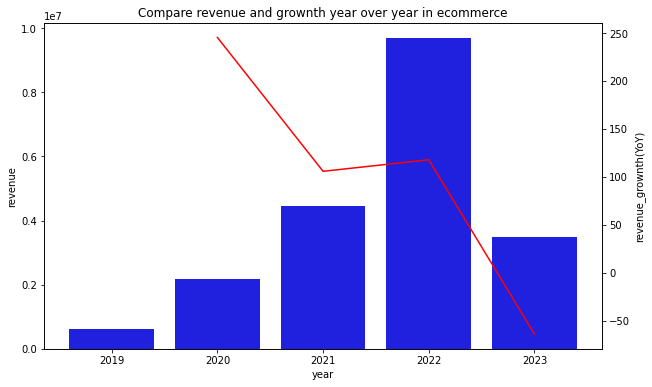

In [ ]:
# Data visualization - revenue and grownth
year['year']=year['year'].astype(str)
f,(ax1) = plt.subplots(figsize = (10,6))
sns.barplot( x = year['year'], y = year['revenue'], ax = ax1, color = 'b')
ax2 = ax1.twinx()
sns.lineplot(x = year['year'], y = year['revenue_grownth(YoY)'], ax = ax2, color = 'r')
plt.title('Compare revenue and grownth year over year in ecommerce')
plt.show()

In [ ]:
#Format values
year['revenue'] = year['revenue'].round(2).map(lambda x : '$ {:,}'.format(x) if x==x else x)
year['revenue_grownth(YoY)'] = year['revenue_grownth(YoY)'].astype(float)
year['revenue_grownth(YoY)'] = year['revenue_grownth(YoY)'].map(lambda x : x==0 if x=='NA' else x)
year['revenue_grownth(YoY)'] = year['revenue_grownth(YoY)'].map(lambda x:'{:,} %'.format(x) if x==x else x)

year

year         revenue revenue_grownth(YoY)
0  2019     $ 626,788.0                  NaN
1  2020  $ 2,164,273.22              245.3 %
2  2021  $ 4,451,404.26             105.68 %
3  2022  $ 9,691,076.94             117.71 %
4  2023   $ 3,486,973.3             -64.02 %

As can be seen that there was a shraph increase in the sales of ecommerce from 2019 to 2022.The revenue growth of sales in 2020 was the highest between 2019 and 2022, up to 245% in the peviouse year.

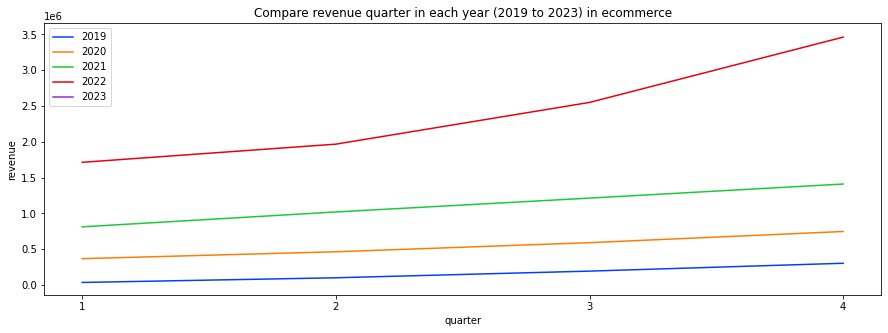

In [ ]:
# Data visualization - revenue by quater
quarter['quarter'] = quarter['quarter'].astype(str)
plt.figure(figsize = (15,5))
sns.lineplot(x = quarter['quarter'], y=quarter['revenue'], hue = quarter['year'], palette = 'bright').set_title('Compare revenue quarter in each year (2019 to 2023) in ecommerce')
plt.legend(loc='upper left')
plt.show()

It is a clear that there was a slight increase in the number of sales between 2019 and 2021. In cast, the propotation of revenue grownth in 2022 rise shraphly in the same time and that is highest during 4 years.

## Where has the largest percentage of sales between 2019 and 2023?

In [ ]:
# Calulate sales for each country from 2019 to 2023
country = results.groupby(['country'])['revenue'].sum().reset_index().sort_values(['revenue'], ascending = False)
country['revenue'] = round(country['revenue'],2)

# Cal avg sale on each country
cnt_year = results['year'].nunique()
country['avg_sales_year'] = round(country['revenue']/cnt_year,2)
country['avg_sales_month'] = round(country['revenue']/((((cnt_year-1)*12)+2)),2)

# Cal revenue of percenatge by country
country['per_revenue'] = round(country['revenue']/sum(country['revenue'])*100,4)

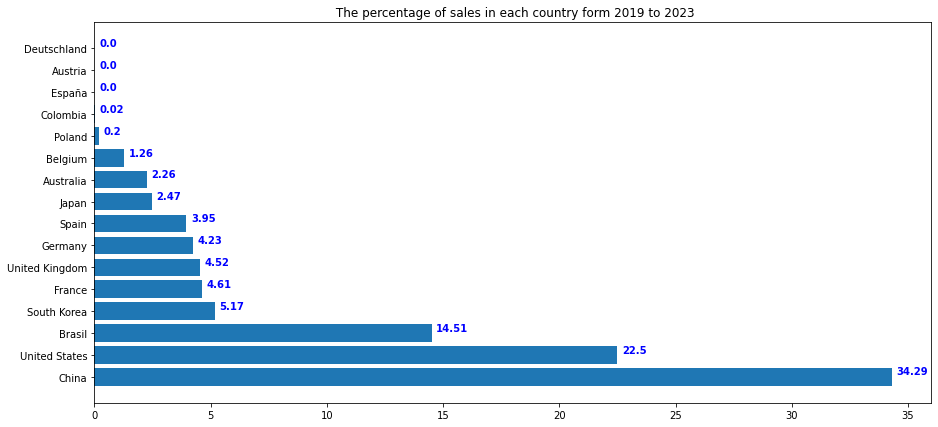

In [ ]:
# Data visualization - percentage revenue for each country

# Figure Size
f, ax = plt.subplots(figsize = (15,7))

# create barh chart
ax.barh(country['country'], country['per_revenue'])

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='b')
# Set title
plt.title(' The percentage of sales in each country form 2019 to 2023')
plt.show()

In [ ]:
# Create table report
#format values
country['revenue'] = country['revenue'].map(lambda x : '$ {:,}'.format(x) if x==x else x)
country['avg_sales_year'] = country['avg_sales_year'].map(lambda x : '$ {:,}'.format(x) if x==x else x)
country['avg_sales_month'] = country['avg_sales_month'].map(lambda x: '$ {:,}'.format(x) if x==x else x)
country['per_revenue'] = country['per_revenue'].map(lambda x: '{:,} %'.format(x) if x==x else x)

country

country         revenue  avg_sales_year avg_sales_month per_revenue
4            China   $ 7,003,053.1  $ 1,400,610.62    $ 140,061.06   34.2942 %
15   United States  $ 4,594,403.87    $ 918,880.77     $ 91,888.08    22.499 %
3           Brasil  $ 2,962,198.47    $ 592,439.69     $ 59,243.97    14.506 %
12     South Korea  $ 1,055,701.73    $ 211,140.35     $ 21,114.03    5.1698 %
8           France    $ 942,300.08    $ 188,460.02      $ 18,846.0    4.6145 %
14  United Kingdom    $ 923,481.85    $ 184,696.37     $ 18,469.64    4.5223 %
9          Germany    $ 864,760.55    $ 172,952.11     $ 17,295.21    4.2348 %
13           Spain    $ 806,821.64    $ 161,364.33     $ 16,136.43     3.951 %
10           Japan     $ 504,648.7    $ 100,929.74     $ 10,092.97    2.4713 %
0        Australia    $ 461,055.91     $ 92,211.18      $ 9,221.12    2.2578 %
2          Belgium     $ 257,921.7     $ 51,584.34      $ 5,158.43    1.2631 %
11          Poland     $ 39,899.51       $ 7,979.9        $ 797.99    0.1954 %
5         Colombia      $ 3,870.84        $ 774.17         $ 77.42     0.019 %
7           España        $ 272.97         $ 54.59          $ 5.46    0.0013 %
1          Austria         $ 106.8         $ 21.36          $ 2.14    0.0005 %
6      Deutschland          $ 18.0           $ 3.6          $ 0.36    0.0001 %

The table give information about amount of purchares spend in each country between 2019 and 2023 in each country. The most spend on buying goods is China at just over 34%, while Austria has the lowest percentage of spend from 2019 to 2023 at 0.0002%. China, US and Brasil which has amount of spend higher than that in orther country during the periods of four years. On the orther hand, Colombia, Espana, Deutschland and Austria which is a group have been less in purchase spend than that orther country.


In [ ]:
# cal revenue by year and country
cn_ye = results.groupby(['year','country'])['revenue'].sum().reset_index().sort_values(['revenue'], ascending = False)

# Format value for report
cn_ye['sale_price_report'] = cn_ye['revenue'].round(2).map(lambda x : '${:,}'.format(x) if x==x else x)

# Create revenue report table by year and country
report = cn_ye.pivot(index = 'country', columns = 'year', values = 'sale_price_report')
report

year                   2019         2020           2021           2022  \
country                                                                  
Australia        $16,341.84    $45,721.5    $104,566.53    $216,389.73   
Austria                 NaN        $68.0            NaN          $38.8   
Belgium          $10,578.16   $27,737.27     $47,761.23    $125,997.52   
Brasil           $92,820.63  $327,722.52    $642,443.59   $1,404,343.9   
China           $209,276.62  $728,310.27  $1,549,276.24  $3,288,603.78   
Colombia              $59.0      $122.99          $16.0      $1,736.83   
Deutschland             NaN          NaN          $18.0            NaN   
España                  NaN          NaN        $272.97            NaN   
France           $34,252.92  $102,824.81    $196,737.77    $446,617.55   
Germany          $23,232.15   $98,056.51    $182,534.66    $418,655.68   
Japan            $28,937.01   $57,355.15    $104,935.41    $218,371.87   
Poland            $1,627.67    $2,326.32      $7,746.79     $22,782.42   
South Korea      $30,080.12  $112,695.83    $247,331.24    $486,429.03   
Spain            $23,680.31   $87,053.58    $172,064.71    $378,775.83   
United Kingdom   $24,039.19   $90,606.85    $197,482.65    $439,275.45   
United States   $131,862.38  $483,671.62    $998,216.46  $2,243,058.54   

year                     2023  
country                        
Australia          $78,036.31  
Austria                   NaN  
Belgium            $45,847.52  
Brasil            $494,867.83  
China           $1,227,586.18  
Colombia            $1,936.02  
Deutschland               NaN  
España                    NaN  
France            $161,867.03  
Germany           $142,281.55  
Japan              $95,049.26  
Poland              $5,416.31  
South Korea       $179,165.51  
Spain             $145,247.21  
United Kingdom    $172,077.71  
United States     $737,594.86

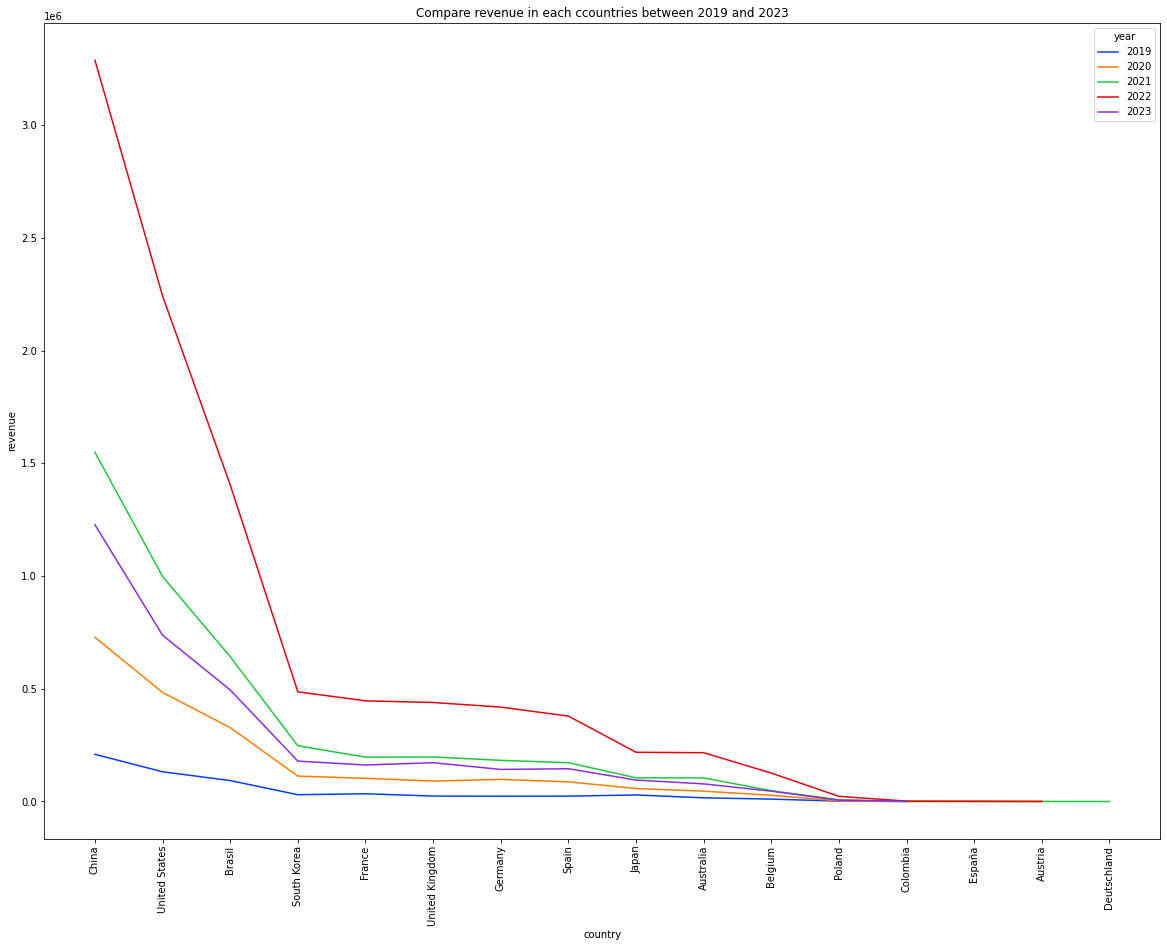

In [ ]:
#Data visualization - revenue by year and country
plt.figure(figsize = (20,15))
sns.lineplot(x = cn_ye['country'], y = cn_ye['revenue'], hue = cn_ye['year'], palette = 'bright')
plt.title('Compare revenue in each ccountries between 2019 and 2023')
plt.xticks(rotation = 90)
plt.show()

## How many is purchase experitured by gender in reaching time?

In [ ]:
# Create statistics table sale price by gender and year
gen = results.groupby(['year','gender']).agg({
    'revenue' :'sum',
    'order_id':'count'})

gen = gen.reset_index().sort_values(['revenue', 'order_id'], ascending = False)

# cal percentage of sale price
#gen['per_revenue'] = round((gen['sale_price']/sum(gen['sale_price'])*100),2)

gen['gender'] = gen['gender'].map(lambda x : 'Male' if x=='M' else 'Female' )
gen

year  gender         revenue  order_id
7  2022    Male  5132992.874835     42845
6  2022  Female  4558084.066027     43047
5  2021    Male  2393542.842207     20159
4  2021  Female  2057861.412816     19780
9  2023    Male  1877122.021662     15325
8  2023  Female  1609851.282131     15175
3  2020    Male  1152608.770851      9503
2  2020  Female  1011664.451281      9738
1  2019    Male   332067.960123      2792
0  2019  Female   294720.040081      2692

In [ ]:
gen_cn = results.groupby(['country','gender']).agg({
    'revenue':'sum',
    'order_id':'count'
})

gen_cn = gen_cn.reset_index().sort_values(['revenue','order_id'], ascending = False)

#gen_cn['per_revenue'] = round((gen_cn['sale_price']/sum(gen['sale_price'])*100),2)
gen_cn['gender'] = gen_cn['gender'].map(lambda x : 'Male' if x=='M' else 'Female' )
gen_cn

country  gender         revenue  order_id
8            China    Male  3727495.403143     30856
7            China  Female   3275557.69373     30850
28   United States    Male  2473192.562261     20328
27   United States  Female  2121211.303147     20192
6           Brasil    Male  1600799.791466     13475
5           Brasil  Female  1361398.681827     12956
22     South Korea    Male   577590.570434      4951
14          France    Male   499555.500544      4223
26  United Kingdom    Male   490557.850323      4092
21     South Korea  Female   478111.160493      4722
16         Germany    Male   462295.830283      3808
13          France  Female   442744.580535      4231
25  United Kingdom  Female   432924.000704      4079
23           Spain  Female   406026.130489      3853
15         Germany  Female   402464.720487      3852
24           Spain    Male   400795.510486      3514
18           Japan    Male    258537.04026      2105
1        Australia    Male   248537.530345      2047
17           Japan  Female   246111.660292      2293
0        Australia  Female   212518.380458      2018
3          Belgium  Female   132127.190175      1185
4          Belgium    Male   125794.510057      1010
20          Poland    Male    21762.280066       206
19          Poland  Female    18137.229989       179
9         Colombia  Female     2723.720011        18
10        Colombia    Male     1147.120003         6
12          España    Male      272.970005         3
2          Austria  Female      106.799999         3
11     Deutschland  Female            18.0         1

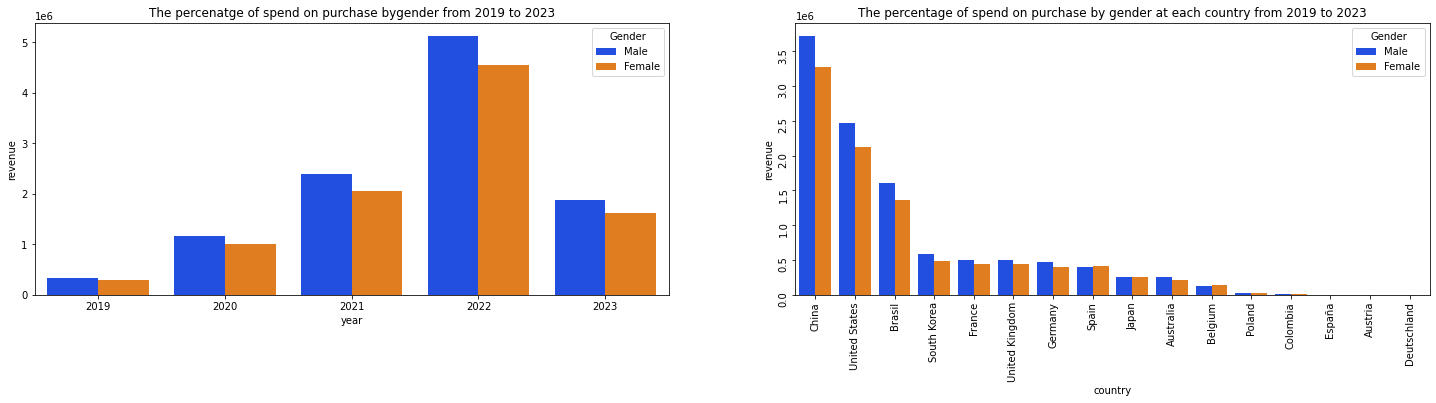

In [ ]:
# Data visualization 
f,(ax1, ax2) = plt.subplots(1,2, figsize = (25,5))

sns.barplot(x = gen['year'], y =gen['revenue'], hue = gen['gender'], palette = 'bright', ax = ax1).set_title('The percenatge of spend on purchase bygender from 2019 to 2023')
sns.barplot(x = gen_cn['country'], y = gen_cn['revenue'], hue = gen_cn['gender'], palette = 'bright', ax = ax2).set_title('The percentage of spend on purchase by gender at each country from 2019 to 2023')

#Add legend
ax1.legend(title = 'Gender',loc = 'upper right')
ax2.legend(title = 'Gender',loc = 'upper right')

#Set rotation of x
ax2.tick_params(rotation=90)

plt.show()

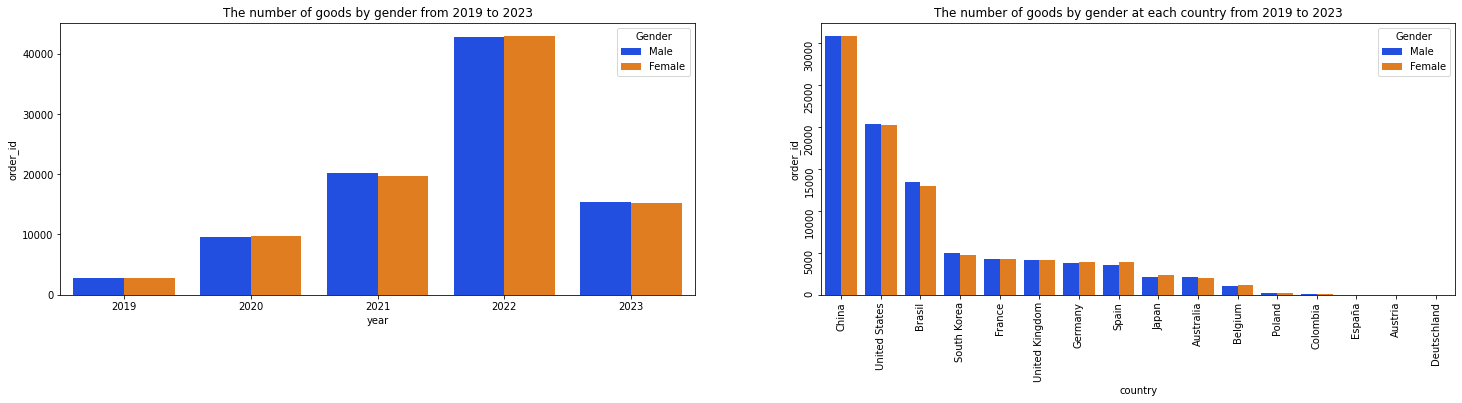

In [ ]:
# Data visualization 
f,(ax1, ax2) = plt.subplots(1,2, figsize = (25,5))

sns.barplot(x = gen['year'], y =gen['order_id'], hue = gen['gender'], palette = 'bright', ax = ax1).set_title('The number of goods by gender from 2019 to 2023')
sns.barplot(x = gen_cn['country'], y = gen_cn['order_id'], hue = gen_cn['gender'], palette = 'bright', ax = ax2).set_title('The number of goods by gender at each country from 2019 to 2023')

#Add legend
ax1.legend(title = 'Gender',loc = 'upper right')
ax2.legend(title = 'Gender',loc = 'upper right')

#Set rotation of x
ax2.tick_params(rotation=90)

plt.show()

As can be the result that percentage of purchase spend in male is more than that in female between 2019 and 2023.

In [ ]:
# Create table report 
# Revenue by gender and year
gen_report = gen.pivot(index = 'year', columns = 'gender', values = 'revenue')
gen_report = pd.DataFrame(gen_report)

#Cal percenatge for each year by gender
gen_report['%_Female'] = gen_report['Female']/(gen_report['Female']+gen_report['Male'])*100
gen_report['%_Male'] = gen_report['Male']/(gen_report['Female']+gen_report['Male'])*100

#Format value
gen_report['Female'] = gen_report['Female'].round(2).map(lambda x : '$ {:,}'.format(x)  if x==x else x )
gen_report['Male'] = gen_report['Male'].round(2).map(lambda x : '$ {:,}'.format(x)  if x==x else x )
gen_report['%_Female'] = gen_report['%_Female'].round(2).map(lambda x : '{:,} %'.format(x)  if x==x else x )
gen_report['%_Male'] = gen_report['%_Male'].round(2).map(lambda x : '{:,} %'.format(x)  if x==x else x )

gen_report

gender          Female            Male %_Female   %_Male
year                                                    
2019      $ 294,720.04    $ 332,067.96  47.02 %  52.98 %
2020    $ 1,011,664.45  $ 1,152,608.77  46.74 %  53.26 %
2021    $ 2,057,861.41  $ 2,393,542.84  46.23 %  53.77 %
2022    $ 4,558,084.07  $ 5,132,992.87  47.03 %  52.97 %
2023    $ 1,609,851.28  $ 1,877,122.02  46.17 %  53.83 %

In [ ]:
# Create table report 
# Revenue by gender and year
gen_cn_report = gen_cn.pivot(index = 'country', columns = 'gender', values = 'revenue')
gen_cn_report = pd.DataFrame(gen_cn_report)

#Fil nul equal '0'
gen_cn_report = gen_cn_report.fillna(0)

#Cal percenatge for each year by gender
gen_cn_report['%_Female'] = gen_cn_report['Female']/(gen_cn_report['Female']+gen_cn_report['Male'])*100
gen_cn_report['%_Male'] = gen_cn_report['Male']/(gen_cn_report['Female']+gen_cn_report['Male'])*100

#Format value
gen_cn_report['Female'] = gen_cn_report['Female'].round(2).map(lambda x : '$ {:,}'.format(x)  if x==x else x )
gen_cn_report['Male'] = gen_cn_report['Male'].round(2).map(lambda x : '$ {:,}'.format(x)  if x==x else x )
gen_cn_report['%_Female'] = gen_cn_report['%_Female'].round(2).map(lambda x : '{:,} %'.format(x)  if x==x else x )
gen_cn_report['%_Male'] = gen_cn_report['%_Male'].round(2).map(lambda x : '{:,} %'.format(x)  if x==x else x )

gen_cn_report

gender                  Female            Male %_Female   %_Male
country                                                         
Australia         $ 212,518.38    $ 248,537.53  46.09 %  53.91 %
Austria                $ 106.8           $ 0.0  100.0 %    0.0 %
Belgium           $ 132,127.19    $ 125,794.51  51.23 %  48.77 %
Brasil          $ 1,361,398.68  $ 1,600,799.79  45.96 %  54.04 %
China           $ 3,275,557.69   $ 3,727,495.4  46.77 %  53.23 %
Colombia            $ 2,723.72      $ 1,147.12  70.37 %  29.63 %
Deutschland             $ 18.0           $ 0.0  100.0 %    0.0 %
España                   $ 0.0        $ 272.97    0.0 %  100.0 %
France            $ 442,744.58     $ 499,555.5  46.99 %  53.01 %
Germany           $ 402,464.72    $ 462,295.83  46.54 %  53.46 %
Japan             $ 246,111.66    $ 258,537.04  48.77 %  51.23 %
Poland             $ 18,137.23     $ 21,762.28  45.46 %  54.54 %
South Korea       $ 478,111.16    $ 577,590.57  45.29 %  54.71 %
Spain             $ 406,026.13    $ 400,795.51  50.32 %  49.68 %
United Kingdom     $ 432,924.0    $ 490,557.85  46.88 %  53.12 %
United States    $ 2,121,211.3  $ 2,473,192.56  46.17 %  53.83 %

The statistics results give information the proportation of spend on excomerce from 2019 to 2023 that was claryfied by each country.


Overall, the expenditure and the number of sell goods were diffence between male and female. There was a sharph grownth in the percentage of revenuew during the period of five years.

As can be seen that the most goods was bought by man, compare with that in women at over 50%. In addition, the revenue rate in boy have been bigger that that in girl.

It is clearly that in South Korea, the man largest spend on purchase, while the women in Colobia was lowest in the amount of revenue at 55.33%, 67.68 % respentive.


## What is the percentage of returned goods in total orders?

In [ ]:
results['status'].unique()

array(['Shipped', 'Complete', 'Cancelled', 'Processing', 'Returned'],
      dtype=object)

In [ ]:
#Create status table
re_rate = results.groupby(['year','status'])['order_id'].count().reset_index()

#Create report table
re_rate = re_rate.pivot(index = 'year',columns = 'status', values = 'order_id')

#Calculate percentage return by each year
re_rate['%_return'] = round(re_rate['Returned']/(re_rate['Cancelled']+re_rate['Complete']+re_rate['Processing']+re_rate['Returned']+re_rate['Shipped'])*100,2)

re_rate

status  Cancelled  Complete  Processing  Returned  Shipped  %_return
year                                                                
2019          879      1292        1077       554     1682     10.10
2020         2934      4794        3808      1878     5827      9.76
2021         5892      9922        8177      4009    11939     10.04
2022        13101     21132       17234      8589    25836     10.00
2023         4551      7766        6121      2977     9085      9.76

As can be result that there was a stablebility in percenatge of returned purchase from 2019 to 2023.

Problem:
- Why order was returned?
- 5M: 
    - method: process, time of process; 
    - man: service; materail: warehouse, 
    - type of goods; machine: vehicle; 
    - management: system
- 1E: 
    - enviroment: region, geogrophy, location

# Cluster - K_Means: Shipped time and delivered time

In [ ]:
df1 = results.drop(columns = ['order_item_id','returned_at','first_name','last_name','gender','country','city','quarter','month'])
df1 = df1[df1['status']=='Complete']
df1['shipped_time'] = (df1['shipped_at'] - df1['created_at']).astype('timedelta64[h]')
df1['delivered_time'] = (df1['delivered_at'] - df1['shipped_at']).astype('timedelta64[h]')
df1['revenue'] = df1['sale_price']*df1['num_of_item']
df1.head()

order_id    status                created_at                shipped_at  \
2    104163  Complete 2020-05-24 07:52:03+00:00 2020-05-27 05:57:00+00:00   
3    117911  Complete 2022-03-21 10:50:31+00:00 2022-03-20 15:46:00+00:00   
9     98130  Complete 2022-09-24 03:50:04+00:00 2022-09-25 12:49:00+00:00   
18    49454  Complete 2023-02-09 15:20:33+00:00 2023-02-10 22:45:00+00:00   
19    60067  Complete 2023-01-21 23:30:45+00:00 2023-01-22 06:34:00+00:00   

                delivered_at  sale_price  num_of_item user_id  year  revenue  \
2  2020-05-29 12:46:00+00:00        2.50            1   83551  2020      2.5   
3  2022-03-23 09:12:00+00:00        2.50            2   94564  2022      5.0   
9  2022-09-28 15:18:00+00:00        3.00            2   78693  2022      6.0   
18 2023-02-12 13:35:00+00:00        3.25            1   39639  2023     3.25   
19 2023-01-26 14:18:00+00:00        3.25            4   48221  2023     13.0   

    shipped_time  delivered_time  
2           70.0            54.0  
3          -20.0            65.0  
9           32.0            74.0  
18          31.0            38.0  
19           7.0           103.0

<Figure size 576x432 with 0 Axes>

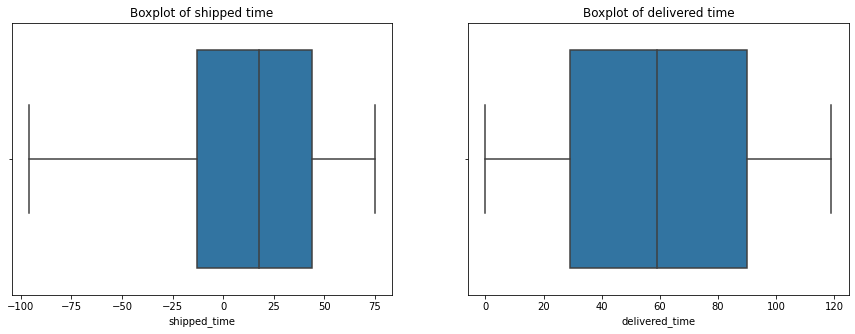

In [ ]:
#Check outlier: shipped time
plt.figure(figsize = (8,6))
f,(ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(df1['shipped_time'], ax = ax1).set_title('Boxplot of shipped time')
sns.boxplot(df1['delivered_time'], ax = ax2).set_title('Boxplot of delivered time')
plt.show()

<Figure size 576x432 with 0 Axes>

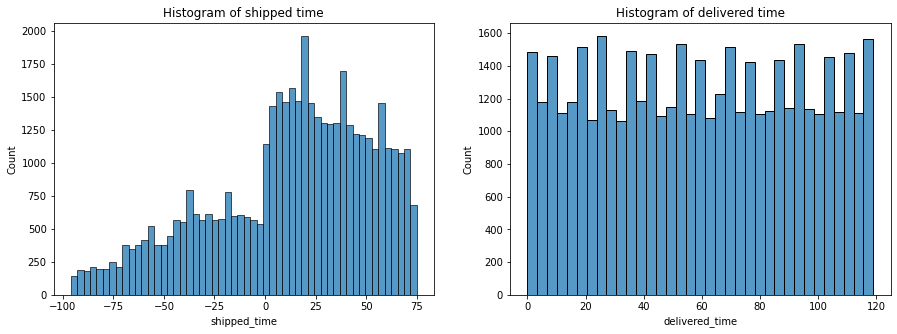

In [ ]:
#Check distribution: shipper and delivered time
plt.figure(figsize = (8,6))
f,(ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
sns.histplot(df1['shipped_time'], ax = ax1).set_title('Histogram of shipped time')
sns.histplot(df1['delivered_time'], ax = ax2).set_title('Histogram of delivered time')
plt.show()

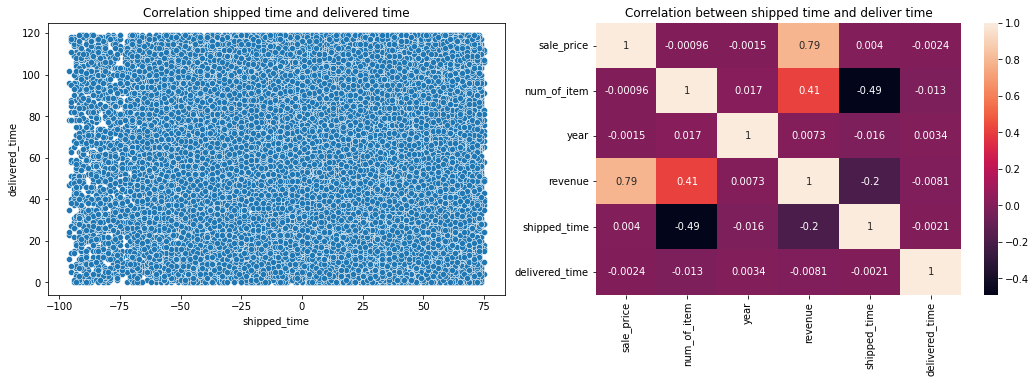

In [ ]:
#Cover negative values to positive values
#df1['shipped_time'] = df1['shipped_time'].map(lambda x : abs(x) if x < 0 else x)
#df1['delivered_time'] = df1['delivered_time'].map(lambda x : abs(x) if x < 0 else x)

# Correlation shipped time and delivered time
f,(ax1,ax2) = plt.subplots(1,2, figsize = (18,5))
sns.scatterplot(df1['shipped_time'],df1['delivered_time'], ax = ax1).set_title('Correlation shipped time and delivered time')
sns.heatmap(df1.corr(), annot = True, ax = ax2).set_title('Correlation between shipped time and deliver time')
plt.show()

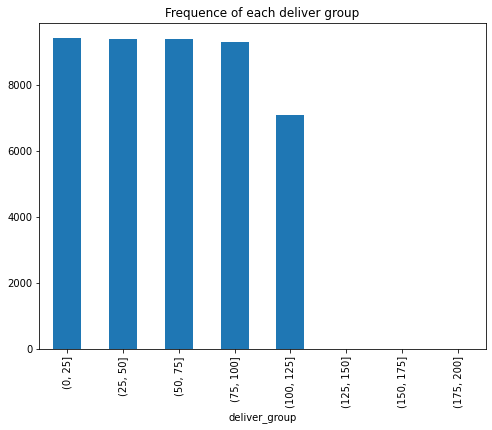

In [ ]:
#Create deliver group
bins = [0,25,50,75,100,125,150,175,200]
df1['deliver_group'] = pd.cut(df1['delivered_time'], bins = bins)

plt.figure(figsize = (8,6))
df1.groupby(['deliver_group'])['order_id'].count().plot(kind = 'bar')
plt.title('Frequence of each deliver group')
plt.show()

In [ ]:
# Apply StandardScaler to data standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df_time = df1[['shipped_time','delivered_time']]
df_time.head()

shipped_time  delivered_time
2           70.0            54.0
3          -20.0            65.0
9           32.0            74.0
18          31.0            38.0
19           7.0           103.0

In [ ]:
#Create model
s = StandardScaler()
s.fit(df_time)
X = s.transform(df_time)

In [ ]:
m = MinMaxScaler()
m.fit(df_time)
X = m.transform(df_time)

In [ ]:
X = pd.DataFrame(X, columns = ['shipped_time', 'delivered_time'])
X.head()

shipped_time  delivered_time
0      1.435735       -0.155802
1     -0.814196        0.161149
2      0.485764        0.420472
3      0.460765       -0.616822
4     -0.139217        1.256071

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

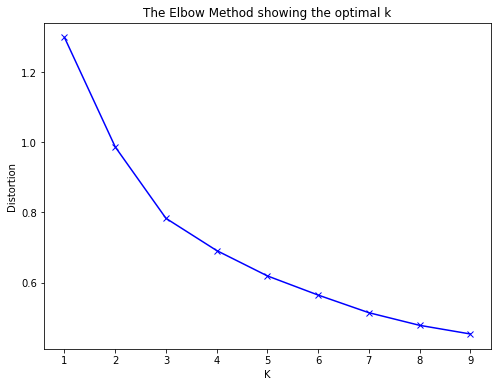

In [ ]:
# k means detremine k
distortions = [] #WSSE
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis = 1))/df1.shape[0])

# Plot the elbow
plt.figure(figsize = (8,6))
plt.plot(K,distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
normal_centroids = s.inverse_transform(centroids)
print(centroids)
print(labels)
print(normal_centroids)

[[-1.4558314   0.00915815]
 [ 0.45343605  0.89280379]
 [ 0.45056927 -0.89177239]]
[2 0 1 ... 2 1 2]
[[-45.66622803  59.72506815]
 [ 30.70683696  90.39258305]
 [ 30.59216188  28.4576695 ]]


In [ ]:
#Melte group to df_time
X['group'] = labels

df_time['group'] = labels

In [ ]:
df_time.head()

shipped_time  delivered_time  group
2           70.0            54.0      2
3          -20.0            65.0      0
9           32.0            74.0      1
18          31.0            38.0      2
19           7.0           103.0      1

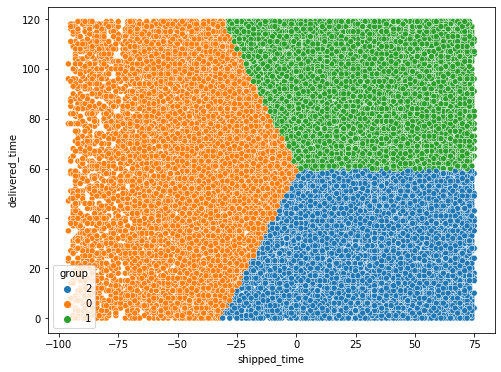

In [ ]:
df_time['group'] = df_time['group'].astype(str)
plt.figure(figsize = (8,6))
sns.scatterplot(df_time['shipped_time'], df_time['delivered_time'], hue = df_time['group'])
plt.show()

In [ ]:
# count for each group
df_time.groupby(['group']).count()

shipped_time  delivered_time
group                              
0             10641           10641
1             17054           17054
2             17211           17211

Từ kết quả phân cụm cho thấy, nhóm 1,2 và 3 chiếm số lượng lớn (0h to 75h), tuy nhiên khách nhau về thời gian giao hàng. 


In [ ]:
i = 0
for cluster in normal_centroids:
  print('--- Centroid: ' + str(i))
  print('Shipped time:', round(cluster[0],2))
  print('Delivered time:', round(cluster[1],2),'\n')
  i = i+1


--- Centroid: 0
Shipped time: -45.67
Delivered time: 59.73 

--- Centroid: 1
Shipped time: 30.71
Delivered time: 90.39 

--- Centroid: 2
Shipped time: 30.59
Delivered time: 28.46 



In [ ]:
df1['group_time'] = labels

In [ ]:
df1[df1['group_time'] ==0]

order_id    status                created_at                shipped_at  \
3        117911  Complete 2022-03-21 10:50:31+00:00 2022-03-20 15:46:00+00:00   
30         5817  Complete 2021-11-10 23:23:50+00:00 2021-11-08 19:45:00+00:00   
36        80049  Complete 2021-11-18 15:36:22+00:00 2021-11-16 20:29:00+00:00   
64        79121  Complete 2022-08-04 01:10:21+00:00 2022-08-01 09:11:00+00:00   
69        17621  Complete 2020-04-13 07:36:24+00:00 2020-04-09 13:42:00+00:00   
...         ...       ...                       ...                       ...   
180925    80215  Complete 2021-11-13 17:02:56+00:00 2021-11-11 18:45:00+00:00   
180979    90829  Complete 2023-02-13 05:10:20+00:00 2023-02-11 10:17:00+00:00   
181022    18683  Complete 2022-07-03 22:47:04+00:00 2022-07-01 21:37:00+00:00   
181027    82945  Complete 2022-11-26 08:08:31+00:00 2022-11-22 19:41:00+00:00   
181028    98671  Complete 2023-02-12 15:35:04+00:00 2023-02-09 20:22:00+00:00   

                    delivered_at  sale_price  num_of_item user_id  year  \
3      2022-03-23 09:12:00+00:00        2.50            2   94564  2022   
30     2021-11-09 21:09:00+00:00        3.50            4    4661  2021   
36     2021-11-18 19:46:00+00:00        3.50            3   64262  2021   
64     2022-08-03 00:52:00+00:00        3.75            2   63515  2022   
69     2020-04-11 21:04:00+00:00        4.00            2   14078  2020   
...                          ...         ...          ...     ...   ...   
180925 2021-11-11 23:11:00+00:00        8.57            2   64379  2021   
180979 2023-02-15 11:09:00+00:00        7.16            4   72791  2023   
181022 2022-07-03 22:43:00+00:00        8.82            4   14942  2022   
181027 2022-11-23 17:13:00+00:00        8.82            2   66533  2022   
181028 2023-02-14 09:47:00+00:00        8.82            2   79125  2023   

          revenue  shipped_time  delivered_time deliver_group  group_time  
3             5.0         -20.0            65.0      (50, 75]           0  
30           14.0         -52.0            25.0       (0, 25]           0  
36           10.5         -44.0            47.0      (25, 50]           0  
64            7.5         -64.0            39.0      (25, 50]           0  
69            8.0         -90.0            55.0      (50, 75]           0  
...           ...           ...             ...           ...         ...  
180925  17.139999         -47.0             4.0       (0, 25]           0  
180979  28.639999         -43.0            96.0     (75, 100]           0  
181022  35.279999         -50.0            49.0      (25, 50]           0  
181027  17.639999         -85.0            21.0       (0, 25]           0  
181028  17.639999         -68.0           109.0    (100, 125]           0  

[10641 rows x 14 columns]

# Cluster - K_means: revenue and orders

In [ ]:
df1 = results
df1['revenue'] = df1['sale_price']*df1['num_of_item']
df1.head()

order_item_id order_id     status                       created_at  \
0         75076    51556    Shipped        2022-11-28 07:41:06+00:00   
1        118747    81570    Shipped 2023-02-18 05:33:36.794320+00:00   
2        151249   104163   Complete        2020-05-24 07:52:03+00:00   
3        171188   117911   Complete        2022-03-21 10:50:31+00:00   
4         24820    17024  Cancelled        2022-07-06 22:06:32+00:00   

                        shipped_at              delivered_at returned_at  \
0        2022-11-25 02:28:00+00:00                       NaT         NaT   
1 2023-02-19 09:57:20.794320+00:00                       NaT         NaT   
2        2020-05-27 05:57:00+00:00 2020-05-29 12:46:00+00:00         NaT   
3        2022-03-20 15:46:00+00:00 2022-03-23 09:12:00+00:00         NaT   
4                              NaT                       NaT         NaT   

   sale_price  num_of_item user_id first_name last_name gender      country  \
0         2.5            4   41381  Gwendolyn   Burgess      F       France   
1         2.5            1   65442     Hannah      Ryan      F  South Korea   
2         2.5            1   83551      Tanya      Ryan      F    Australia   
3         2.5            2   94564  Stephanie   Johnson      F       Brasil   
4         2.5            1   13616    Cynthia  Erickson      F  South Korea   

         city  year  quarter  month  revenue  
0     Roubaix  2022        4     11     10.0  
1       Busan  2023        1      2      2.5  
2   Toowoomba  2020        2      5      2.5  
3      Manaus  2022        1      3      5.0  
4  Suwon City  2022        3      7      2.5

In [ ]:
# Cal total revenue and ordercount for each user
user = df1.groupby(['user_id']).agg({
    'revenue':'sum',
    'order_id': lambda x: x.nunique()
})

In [ ]:
# Create columns for user dataframe
user.columns = ['revenue', 'order_count']
user['avg_order_value'] = user['revenue']/user['order_count']
user.head()

revenue  order_count  avg_order_value
user_id                                          
1        200.869995            1       200.869995
10       380.990005            3       126.996668
100000        100.0            1            100.0
10001         178.0            1            178.0
10002         94.49            3        31.496667

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79806 entries, 1 to 99999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   revenue          79806 non-null  Float64
 1   order_count      79806 non-null  int64  
 2   avg_order_value  79806 non-null  Float64
dtypes: Float64(2), int64(1)
memory usage: 2.6+ MB


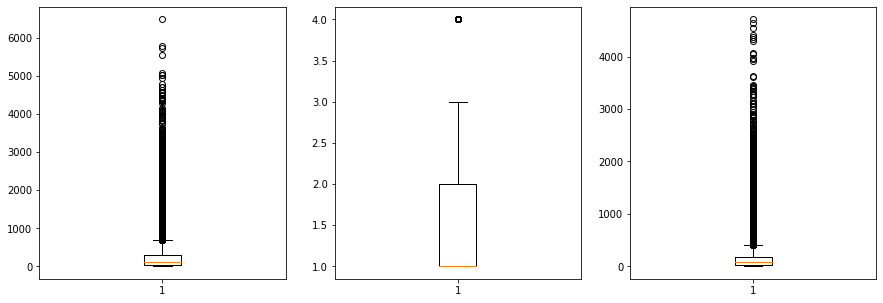

In [ ]:
#Check outlier
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.boxplot(user['revenue'])

plt.subplot(1,3,2)
plt.boxplot(user['order_count'])

plt.subplot(1,3,3)
plt.boxplot(user['avg_order_value'])
plt.show()

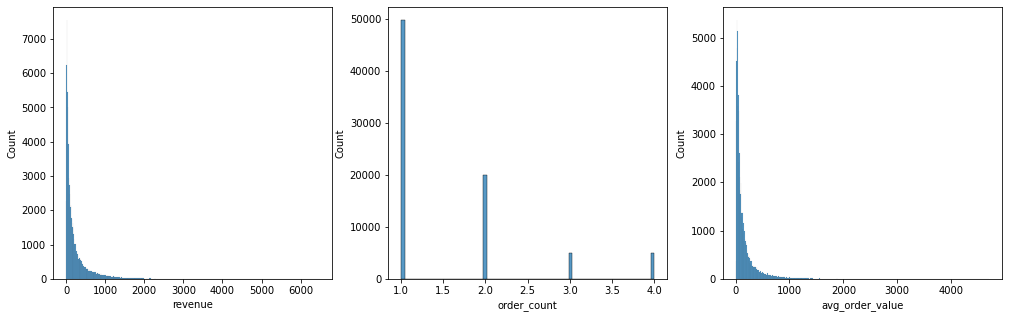

In [ ]:
# Check distribution
plt.figure(figsize = (17,5))

plt.subplot(1,3,1)
sns.histplot(user['revenue'])

plt.subplot(1,3,2)
sns.histplot(user['order_count'])

plt.subplot(1,3,3)
sns.histplot(user['avg_order_value'])

plt.show()

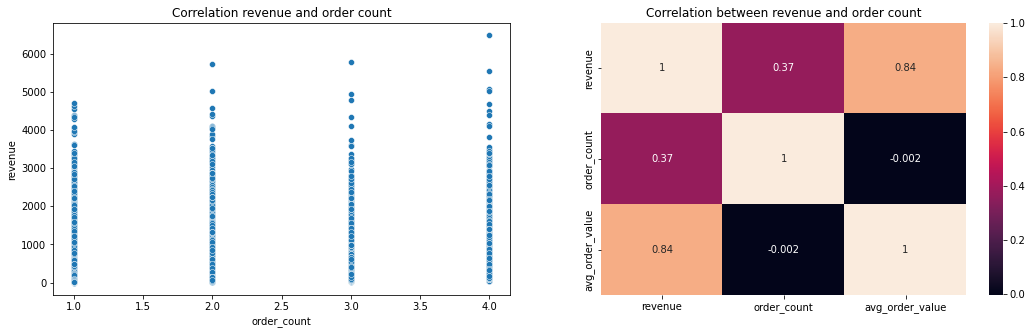

In [ ]:
# Correlation 
f,(ax1,ax2) = plt.subplots(1,2, figsize = (18,5))
sns.scatterplot(user['order_count'],user['revenue'], ax = ax1).set_title('Correlation revenue and order count')
sns.heatmap(user.corr(), annot = True, ax = ax2).set_title('Correlation between revenue and order count')
plt.show()

In [ ]:
user_df = user[['revenue','order_count']]

In [ ]:
# Scaler 
s = StandardScaler()
s.fit(user_df)
X = s.transform(user_df)

In [ ]:
X = pd.DataFrame(X, columns = ['revenue', 'order_count'])
X.head()

revenue  order_count
0 -0.147123    -0.651861
1  0.334632     1.668394
2 -0.416914    -0.651861
3 -0.208292    -0.651861
4 -0.431651     1.668394

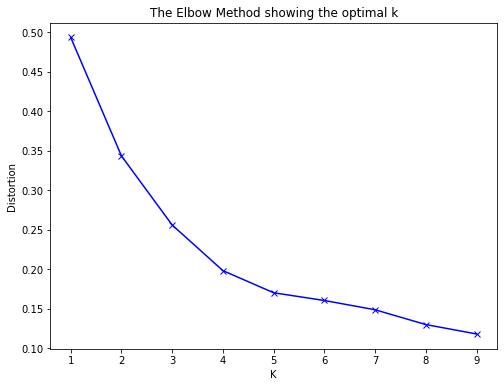

In [ ]:
# k means detremine k
distortions = [] #WSSE
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis = 1))/df1.shape[0])

# Plot the elbow
plt.figure(figsize = (8,6))
plt.plot(K,distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
normal_centroids = s.inverse_transform(centroids)
print('Centroids:', centroids,'\n')
print('Labels:',labels,'\n')
print('Normal centroids:',normal_centroids,'\n')

Centroids: [[-0.42883761 -0.65186115]
 [ 0.45634497  2.23205877]
 [ 1.49396332 -0.17067391]
 [-0.18492864  0.50826621]
 [ 4.20018865  1.28669663]] 

Labels: [0 1 0 ... 3 0 2] 

Normal centroids: [[9.55419175e+01 1.00000000e+00]
 [4.26496508e+02 3.48586493e+00]
 [8.14444218e+02 1.41477105e+00]
 [1.86735301e+02 2.00000000e+00]
 [1.82625547e+03 2.67098704e+00]] 



In [ ]:
#Melte group to df_time
X['group'] = labels

user_df['group'] = labels

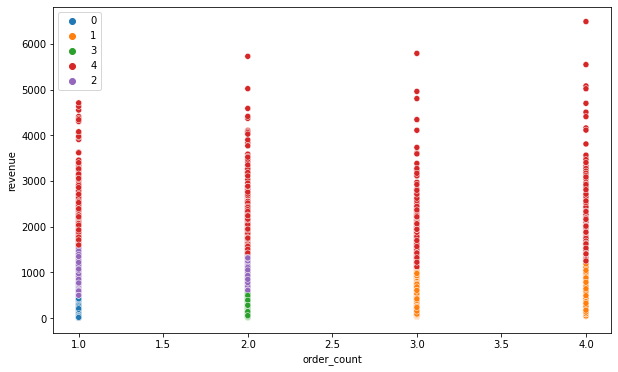

In [ ]:
user_df['group'] = user_df['group'].astype(str)
plt.figure(figsize = (10,6))
sns.scatterplot(user_df['order_count'], user_df['revenue'], hue = user_df['group'])
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Determine group
i = 0
for cluster in normal_centroids:
  print('--- Centroid Cluster --- ' + str(i),'\n')
  print('Revenue:',round(cluster[0],2))
  print('Order count:',round(cluster[1],2),'\n')
  i = i+1

--- Centroid Cluster --- 0 

Revenue: 95.54
Order count: 1.0 

--- Centroid Cluster --- 1 

Revenue: 426.5
Order count: 3.49 

--- Centroid Cluster --- 2 

Revenue: 814.44
Order count: 1.41 

--- Centroid Cluster --- 3 

Revenue: 186.74
Order count: 2.0 

--- Centroid Cluster --- 4 

Revenue: 1826.26
Order count: 2.67 



In [ ]:
user_df.groupby('group').count()

revenue  order_count
group                      
0        45585        45585
1         8914         8914
2         6783         6783
3        16517        16517
4         2007         2007

với kết quả phân tích cluster trên revenue và order count, chia tập dữ liệu 5 nhóm.

Từ kết quả thống kê cho thấy cluster 0 có số lượng khách hàng cao nhất trong 5 nhóm, doanh thu từ nhóm này thấp nhất và tần xuất mua hàng của nhóm này thấp. --> nhóm khach hàng giá trị thấp, tần suất thấp. 

Trong khi đó, nhóm cluster 4 có lượng khach hàng thấp nhất, giá trị mùa hàng cao nhất và tần suất mùa hàng cao. --> nhóm khách hàng cao cấp.

Nhóm cluster 1, chi trả khoảng tiền mua hàng lớn nhóm 0 và 3, nhưng tần suất mua hàng cao nhất trong tất cả các nhóm. --> nhóm khách hàng thường xuyên.

Nhóm cluster 2 chi trả việc mùa hàng cao hơn các nhóm 0,1,3 và tần xuất mùa hàng thấp. --> nhóm khách hàng tiềm năng.



#### Add cluster labels columns

In [ ]:
#Add label cluster group column
conditions =[
    (user_df['group']=='4'),
    (user_df['group']=='3'),
    (user_df['group']=='2'),
    (user_df['group']=='1'),
    (user_df['group']=='0')
]

values =['VIP', 'Mid spender','Potential spender','High spender','Low spender']

user_df['cluster_group'] = np.select(conditions, values)

In [ ]:
user_df.head()

revenue  order_count group cluster_group
user_id                                             
1        200.869995            1     0   Low spender
10       380.990005            3     1  High spender
100000        100.0            1     0   Low spender
10001         178.0            1     0   Low spender
10002         94.49            3     1  High spender

# Customer lifecycle values analysis


In [ ]:
df_clv = results[['user_id','order_id','created_at','revenue','num_of_item']]

## Standardizing Data

### Analysis Countinuous data

In [ ]:
#Describe sale_price
df_clv['revenue'].describe()

count      181056.0
mean     112.785634
std      156.760391
min            0.02
25%            34.0
50%       65.300003
75%      131.960007
max          3996.0
Name: revenue, dtype: Float64

In [ ]:
import numpy as np
import statistics as st

range = max(df_clv['revenue']) - min(df_clv['revenue'])
print('range of sale price:', range)

mode = st.mode(df_clv['revenue'])
print('mode os sale price:', mode)

diff_mean_median = np.mean(df_clv['revenue']) - st.median(df_clv['revenue'])
print('Differance between mean and median:', diff_mean_median)

range of sale price: 3995.980000000447
mode os sale price: 25.0
Differance between mean and median: 47.48563079640326


Sale price data can have outlier.

### Dealing Outlier of sale price

#### Applying IQR

In [ ]:
def interquartile_range_method(data,variable):
  #find Q1, Q3, and interquartile range
  Q1 = data['variable'].quantile(q=0.25)
  Q3 = data['variable'].quantile(q=0.75)
  IQR = data['variable'].apply(st.iqr)
  data_clean_iqr_range = data['variable'][~((data['variable'] < (Q1 - 1.5*IQR))|(data['variable'] > (Q3 + 1.5*IQR))).any(axis = 1)]

In [ ]:
# Calculate Q1, Q3 and IQR of sale price
Q1 = np.quantile(df_clv['revenue'],0.25)
Q3 = np.quantile(df_clv['revenue'],0.75)
IQR = Q3 - Q1
print('IQR_revenue:',IQR)
print('Var_revenue:',df_clv['revenue'].var())
print('Std_revenue:',df_clv['revenue'].std())

IQR_revenue: 97.96000671386719
Var_revenue: 24573.820195755554
Std_revenue: 156.76039102960783


In [ ]:
# Calculate skew and kurtosis of sale price
print('Skew of sale price:',df_clv['revenue'].skew())
print('Kurtosis of sale price:',df_clv['revenue'].kurtosis())

Skew of sale price: 6.37721022169816
Kurtosis of sale price: 81.89401415787083


Skew = 4.87 > 0 so sale price data with a distribution model deviating to the right from the standard distribution model.

Kurtosis = 42 > 0 so sharp corner combine with standard distribution mode.

In [ ]:
#Calculate amount of outlier
outlier = df_clv[df_clv['revenue']>(Q3 + 1.5*IQR)]
print('Amount of upper outlier:', outlier.shape[0])

#Percentage of outlier in dataset
print('Percentage of outlirer:',outlier.shape[0]/len(df_clv)*100)

Amount of upper outlier: 14695
Percentage of outlirer: 8.116273418168966


#### Apply six sigma

In [ ]:
def z_score_method(data):
  #find absolute value of z-score for each observation
  z = np.abs(st.zscore(data))
  #only keep rows in dataframe with all z-score less than absolute value of 3
  data_clean_z_score = data[(z<3).all(axis=1)]

### Analysis category data

### Analysis Countinuous with countinuous

In [ ]:
#plt.figure(figsize=(15,9))
#corrMatrix = df[['price', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']].corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [ ]:
#f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,sharey=True,figsize = (30,5))
#sns.scatterplot(data=df, x='length',y='price',ax=ax1)
#sns.scatterplot(data=df, x='width',y='price',ax=ax2)
#sns.scatterplot(data=df, x='curb-weight',y='price',ax=ax3)
#sns.scatterplot(data=df, x='engine-size',y='price',ax=ax4)
#sns.scatterplot(data=df, x='horsepower',y='price',ax=ax5)
#plt.show()

### Analysis Category and Countinuous

In [ ]:
#df1 = df[['price','fuel-type','aspiration','num-of-doors','engine-location']]
#df1.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoder = LabelEncoder()

In [ ]:
#df1['fencode']=encoder.fit_transform(df1['fuel-type'])


In [ ]:
#f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,6),sharey=True)
#sns.boxplot(x=df1['fencode'],y=df1['price'],hue=df1['eencode'],data=df1,ax=ax1)
#sns.boxplot(x=df1['aencode'],y=df1['price'],hue=df1['eencode'],data=df1,ax=ax2)
#sns.boxplot(x=df1['nencode'],y=df1['price'],hue=df1['eencode'],data=df1,ax=ax3)
#plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Creat mode
#model1 = ols('price ~ C(fencode) + C(aencode) + C(nencode) + C(eencode)', data=df1).fit()

In [ ]:
#anova_table = sm.stats.anova_lm(model1, typ=2)
#anova_table

### Normalization Data

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
#df_scale = scaler.fit_transform(continous_cols[['length', 'width','curb-weight', 'engine-size','horsepower','city-mpg', 'highway-mpg']])

## CLTV implement using Churn rate, AOV, Profit margin

In [ ]:
df_clv.head()

user_id order_id                       created_at  revenue  num_of_item
0   41381    51556        2022-11-28 07:41:06+00:00     10.0            4
1   65442    81570 2023-02-18 05:33:36.794320+00:00      2.5            1
2   83551   104163        2020-05-24 07:52:03+00:00      2.5            1
3   94564   117911        2022-03-21 10:50:31+00:00      5.0            2
4   13616    17024        2022-07-06 22:06:32+00:00      2.5            1

In [ ]:
#Create orders table with user_id, sale_price and created_at
clv_data = df_clv.groupby('user_id').agg({
    'created_at':lambda date :(date.max() - date.min()).days,
    'order_id': lambda num : num.count(),
    'num_of_item': sum,
    'revenue': sum 
})

In [ ]:
# Add columns
clv_data.columns=['num_days','num_transactions','num_units','spent_money']
clv_data.head()

num_days  num_transactions  num_units  spent_money
user_id                                                    
1               0                 1          1   200.869995
10            875                 4          6   380.990005
100000          0                 2          4        100.0
10001           0                 1          1        178.0
10002         300                 3          3        94.49

### Data Analysis



#### Calculate CLTV 
- CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

- Customer Value = Average Order Value * Purchase Frequency

In [ ]:
# 1. Calculate Average Order Value
clv_data['avg_order_value']=clv_data['spent_money']/clv_data['num_transactions']

# 2. Calculate Purchase Frequency
purchase_frequency = sum(clv_data['num_transactions'])/clv_data.shape[0]

# 3. Calculate Repeat Rate and Churn Rate

## Repeat Rate
repeat_rate = clv_data[clv_data['num_transactions']> 1].shape[0]/clv_data.shape[0]

##Churn Rate
churn_rate = 1-repeat_rate

# 4. Profit Margin
clv_data['profit_margin']=clv_data['spent_money']*0.05

#Profit margin is the commonly used profitability ratio. 
#It represents how much percentage of total sales has earned as the gain. 
#Let's assume our business has approx 5% profit on the total sale.

print('Purchase frequency:',round(purchase_frequency,2),'\n')
print('Repeat rate:',round(repeat_rate,2),'\n')
print('Churn rate:',round(churn_rate,2),'\n')

Purchase frequency: 2.27 

Repeat rate: 0.56 

Churn rate: 0.44 



In [ ]:
clv_data.head()

num_days  num_transactions  num_units  spent_money  avg_order_value  \
user_id                                                                        
1               0                 1          1   200.869995       200.869995   
10            875                 4          6   380.990005        95.247501   
100000          0                 2          4        100.0             50.0   
10001           0                 1          1        178.0            178.0   
10002         300                 3          3        94.49        31.496667   

         profit_margin  
user_id                 
1              10.0435  
10             19.0495  
100000             5.0  
10001              8.9  
10002           4.7245

#### Calcualte Customer Lifetime Value -CLV

In [ ]:
#1 Customer Value
clv_data['CLV']=(clv_data['avg_order_value']*purchase_frequency)/churn_rate

#2 Customer Lifetime Value
clv_data['cust_lifetime_value']=clv_data['CLV']*clv_data['profit_margin']

clv_data.head()

num_days  num_transactions  num_units  spent_money  avg_order_value  \
user_id                                                                        
1               0                 1          1   200.869995       200.869995   
10            875                 4          6   380.990005        95.247501   
100000          0                 2          4        100.0             50.0   
10001           0                 1          1        178.0            178.0   
10002         300                 3          3        94.49        31.496667   

         profit_margin          CLV  cust_lifetime_value  
user_id                                                   
1              10.0435  1045.919643         10504.693682  
10             19.0495   495.948798          9447.576766  
100000             5.0   260.347406           1301.73703  
10001              8.9   926.836765           8248.84721  
10002           4.7245   164.001509           774.825127

In [ ]:
# Add cummulative value
clv_data.sort_values(['cust_lifetime_value'], ascending = False, inplace = True)
clv_data['cum_CTLV'] = clv_data['num_transactions'].cumsum()/clv_data['num_transactions'].sum()*100 

clv_data.head()

num_days  num_transactions  num_units  spent_money  avg_order_value  \
user_id                                                                        
70163         670                 5         17  5725.160019      1145.032004   
83136           1                 4         16  4707.799999          1176.95   
65667           3                 4         16  4631.839996      1157.959999   
42409           2                 4         16   4550.43998      1137.609995   
51792           3                 4         16  4410.800049      1102.700012   

         profit_margin          CLV  cust_lifetime_value  cum_CTLV  
user_id                                                             
70163       286.258001  5962.122239       1706705.193389  0.002762  
83136           235.39  6128.317588       1442544.676775  0.004971  
65667          231.592  6029.437639        1396369.52066  0.007180  
42409       227.521999  5923.476223       1347721.151208  0.009389  
51792       220.540002  5741.701755       1266274.918972  0.011599

In [ ]:

from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#### Paretor chart

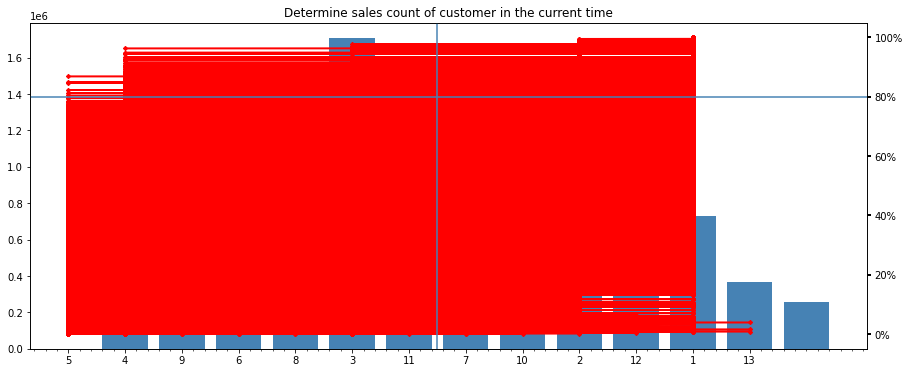

In [ ]:
#Define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 3

#create nasic bar plot
fig,ax = plt.subplots(figsize = (15,6))
ax.bar(clv_data['num_transactions'], clv_data['cust_lifetime_value'], color = color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(clv_data['num_transactions'], clv_data['cum_CTLV'], color = color2, marker='D', ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#Specify axis colors
ax.tick_params(axis='y', colors='black')
ax2.tick_params(axis='y', colors='black')

#Add minor and major
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.tick_params(which='both', width=2)
plt.tick_params(which = 'major', length = 4)
plt.tick_params(which = 'minor',length = 7)

#Add line 
ax2.axhline(80,linestyle = '-', color = 'steelblue')
ax2.axvline(6.5, linestyle = '-', color = 'steelblue')

plt.title('Determine sales count of customer in the current time')
plt.show()

As can be seen results that 80% sale price in percentage of revenue have been gotten from customers who have total number of repeat purchase is 4 times, at 20%.

## CLTV implement using RFM analysis

### Data Analysis

In [ ]:
results.head()

order_item_id order_id     status                       created_at  \
0         75076    51556    Shipped        2022-11-28 07:41:06+00:00   
1        118747    81570    Shipped 2023-02-18 05:33:36.794320+00:00   
2        151249   104163   Complete        2020-05-24 07:52:03+00:00   
3        171188   117911   Complete        2022-03-21 10:50:31+00:00   
4         24820    17024  Cancelled        2022-07-06 22:06:32+00:00   

                        shipped_at              delivered_at returned_at  \
0        2022-11-25 02:28:00+00:00                       NaT         NaT   
1 2023-02-19 09:57:20.794320+00:00                       NaT         NaT   
2        2020-05-27 05:57:00+00:00 2020-05-29 12:46:00+00:00         NaT   
3        2022-03-20 15:46:00+00:00 2022-03-23 09:12:00+00:00         NaT   
4                              NaT                       NaT         NaT   

   sale_price  num_of_item user_id first_name last_name gender      country  \
0         2.5            4   41381  Gwendolyn   Burgess      F       France   
1         2.5            1   65442     Hannah      Ryan      F  South Korea   
2         2.5            1   83551      Tanya      Ryan      F    Australia   
3         2.5            2   94564  Stephanie   Johnson      F       Brasil   
4         2.5            1   13616    Cynthia  Erickson      F  South Korea   

         city  year  quarter  month  revenue  
0     Roubaix  2022        4     11     10.0  
1       Busan  2023        1      2      2.5  
2   Toowoomba  2020        2      5      2.5  
3      Manaus  2022        1      3      5.0  
4  Suwon City  2022        3      7      2.5

In [ ]:
rfm = results[['user_id','created_at','revenue','order_id']]
rfm.head()

user_id                       created_at  revenue order_id
0   41381        2022-11-28 07:41:06+00:00     10.0    51556
1   65442 2023-02-18 05:33:36.794320+00:00      2.5    81570
2   83551        2020-05-24 07:52:03+00:00      2.5   104163
3   94564        2022-03-21 10:50:31+00:00      5.0   117911
4   13616        2022-07-06 22:06:32+00:00      2.5    17024

In [ ]:
# Cal RMF
rfm = rfm.groupby('user_id').agg({
 'created_at': [max,len],
 'revenue':sum
})

rfm.head()

created_at         revenue
                              max len         sum
user_id                                          
1       2020-12-02 01:36:49+00:00   1  200.869995
10      2022-07-29 23:54:19+00:00   4  380.990005
100000  2022-11-06 14:32:24+00:00   2       100.0
10001   2022-04-05 12:05:04+00:00   1       178.0
10002   2022-01-31 03:49:20+00:00   3       94.49

In [ ]:
rfm.columns=['max','frequency','monetary']
rfm.head()

max  frequency    monetary
user_id                                                 
1       2020-12-02 01:36:49+00:00          1  200.869995
10      2022-07-29 23:54:19+00:00          4  380.990005
100000  2022-11-06 14:32:24+00:00          2       100.0
10001   2022-04-05 12:05:04+00:00          1       178.0
10002   2022-01-31 03:49:20+00:00          3       94.49

In [ ]:
import datetime as dt
rfm['recency'] = ((max(rfm['max'])-rfm['max']))
rfm['recency'] = rfm['recency'].dt.days
rfm.tail()

max  frequency    monetary  recency
user_id                                                          
99992   2022-04-29 14:01:57+00:00          2   89.349998      301
99994   2021-05-04 23:22:00+00:00          2  142.010002      660
99996   2023-01-03 22:27:21+00:00          2       53.99       51
99998   2022-02-24 01:28:53+00:00          1        15.0      365
99999   2021-08-01 12:49:49+00:00          1       498.0      572

In [ ]:
#Ranking Customer’s based upon their recency, frequency, and monetary score
# Computing Quantile of RFM values
rfm['R_rank'] = rfm['recency'].rank(ascending=False)
rfm['F_rank'] = rfm['frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm.head()

max  frequency    monetary  recency  \
user_id                                                             
1       2020-12-02 01:36:49+00:00          1  200.869995      814   
10      2022-07-29 23:54:19+00:00          4  380.990005      209   
100000  2022-11-06 14:32:24+00:00          2       100.0      110   
10001   2022-04-05 12:05:04+00:00          1       178.0      325   
10002   2022-01-31 03:49:20+00:00          3       94.49      389   

         R_rank_norm  F_rank_norm  M_rank_norm  
user_id                                         
1           8.994722    21.786229    21.785956  
10         50.438140    85.297914    85.296845  
100000     66.604195    55.931333    55.930632  
10001      37.298951    21.786229    21.785956  
10002      31.494064    74.469645    74.468712

#### Calculating RFM score

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. 

Based upon this score we divide our customers. Here we rate them on a scale of 5. 

Formula used for calculating rfm score is : 0.15 *Recency score + 0.28 *Frequency score + 0.57 *Monetary score

In [ ]:
# Calculating RFM score

rfm['RFM_Score'] = 0.15*rfm['R_rank_norm'] + 0.28*rfm['F_rank_norm'] + 0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)

rfm.head()

max  frequency  monetary  recency  R_rank_norm  \
user_id                                                                        
1       2020-12-02 01:36:49+00:00          1    200.87      814         8.99   
10      2022-07-29 23:54:19+00:00          4    380.99      209        50.44   
100000  2022-11-06 14:32:24+00:00          2     100.0      110        66.60   
10001   2022-04-05 12:05:04+00:00          1     178.0      325        37.30   
10002   2022-01-31 03:49:20+00:00          3     94.49      389        31.49   

         F_rank_norm  M_rank_norm  RFM_Score  
user_id                                       
1              21.79        21.79       0.99  
10             85.30        85.30       4.00  
100000         55.93        55.93       2.88  
10001          21.79        21.79       1.21  
10002          74.47        74.47       3.40

#### Add labels for RFM score

In [ ]:
# Rating Customer based upon the RFM score
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] > 4.5, "Top Customers",
                                      (np.where(rfm['RFM_Score'] > 4, "High value Customer",
                                        (np.where(rfm['RFM_Score'] > 3,"Medium Value Customer", 
                                                  np.where(rfm['RFM_Score'] > 1.6,
                                                           'Low Value Customers', 'Lost Customers'))))))
rfm.head(20)

max  frequency  monetary  recency  \
user_id                                                                  
1              2020-12-02 01:36:49+00:00          1    200.87      814   
10             2022-07-29 23:54:19+00:00          4    380.99      209   
100000         2022-11-06 14:32:24+00:00          2     100.0      110   
10001          2022-04-05 12:05:04+00:00          1     178.0      325   
10002          2022-01-31 03:49:20+00:00          3     94.49      389   
10003          2022-08-05 07:50:55+00:00          2     73.89      203   
10004          2022-10-09 23:07:02+00:00          1     39.88      137   
10006          2022-05-11 10:02:29+00:00          1      73.0      289   
10007   2023-02-20 08:57:37.214997+00:00          1      30.0        4   
1001           2022-11-20 13:19:19+00:00          6   1026.42       96   
10011          2022-04-21 09:20:19+00:00          1      32.0      309   
10012          2022-07-16 06:17:18+00:00          2     219.0      223   
10013          2022-12-17 04:15:40+00:00          6   1622.75       69   
10015          2022-05-20 08:05:37+00:00          3    156.98      280   
10016          2020-10-28 18:10:22+00:00          4    544.48      849   
10017          2022-08-20 04:03:36+00:00          2     154.1      188   
10019          2023-02-11 23:37:54+00:00          1     24.99       12   
1002           2022-11-28 04:07:17+00:00          3    176.96       88   
10020          2022-10-01 03:29:14+00:00          3    635.97      146   
10021          2022-01-04 14:07:22+00:00          1     32.44      416   

         R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  \
user_id                                                     
1               8.99        21.79        21.79       0.99   
10             50.44        85.30        85.30       4.00   
100000         66.60        55.93        55.93       2.88   
10001          37.30        21.79        21.79       1.21   
10002          31.49        74.47        74.47       3.40   
10003          51.28        55.93        55.93       2.76   
10004          61.52        21.79        21.79       1.39   
10006          40.74        21.79        21.79       1.23   
10007          98.72        21.79        21.79       1.67   
1001           69.36        96.26        96.26       4.61   
10011          38.82        21.79        21.79       1.22   
10012          48.58        55.93        55.93       2.74   
10013          75.61        96.26        96.26       4.66   
10015          41.72        74.47        74.47       3.48   
10016           7.93        85.30        85.30       3.68   
10017          53.35        55.93        55.93       2.78   
10019          93.43        21.79        21.79       1.63   
1002           71.10        74.47        74.47       3.70   
10020          59.99        74.47        74.47       3.61   
10021          29.26        21.79        21.79       1.15   

              Customer_segment  
user_id                         
1               Lost Customers  
10       Medium Value Customer  
100000     Low Value Customers  
10001           Lost Customers  
10002    Medium Value Customer  
10003      Low Value Customers  
10004           Lost Customers  
10006           Lost Customers  
10007      Low Value Customers  
1001             Top Customers  
10011           Lost Customers  
10012      Low Value Customers  
10013            Top Customers  
10015    Medium Value Customer  
10016    Medium Value Customer  
10017      Low Value Customers  
10019      Low Value Customers  
1002     Medium Value Customer  
10020    Medium Value Customer  
10021           Lost Customers